In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import sklearn as sklearn
from matplotlib.ticker import StrMethodFormatter
import matplotlib.pyplot as plt
import pygwalker as pg

In [2]:
# 기본 폰트를 사용하여 한글 설정
plt.rc('font', family='DejaVu Sans')  # 'DejaVu Sans'는 기본적으로 설치되어 있는 폰트 중 하나로, 한글을 지원합니다.
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호가 깨지지 않도록 설정

In [ ]:
pip install selenium webdriver-manager

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service



In [ ]:
# ChromeDriverManager를 사용하여 드라이버를 설치하고 경로를 얻음
driver_path = ChromeDriverManager().install()
# Service 객체를 생성하여 드라이버 초기화
service = Service(driver_path)
driver = webdriver.Chrome(service=service)

---------------

## 크롤링 테스트

In [ ]:
# 드라이버를 사용한 작업 수행 예제
driver.get("http://www.google.com")
search_box = driver.find_element("name", "q")
search_box.send_keys("Selenium")
search_box.send_keys(Keys.RETURN)

In [ ]:
# 드라이버 종료
driver.quit()

-----------------------

## pdqcut시 경계의 duplicated되는 부분 알아서 퍼센트 조절하는 반복문 함수 => 시간 개오래걸림.

In [ ]:
def qcut_with_adjustment(series, q, labels=None):
    while True:
        try:
            return pd.qcut(series, q=q, labels=labels)
        except ValueError as e:
            if 'Bin edges must be unique' in str(e):
                q = [0] + [i/len(series) for i in range(1, len(series))]
            else:
                raise e

# 출력값 길이 한계 조절

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 20)  # 생략하지 않고 표시할 최대 행 수를 설정
pd.set_option('display.min_rows', 10)

# PG WALKER 

In [ ]:
walker = pg.walk(df)

---------------------------------

+ H&M 그룹 은 53개의 온라인 마켓과 약 4,850개의 매장을 보유한 브랜드와 사업체입니다.
- 온라인 매장에서 구매 전환율을 높이고, 당사의 쇼핑 경험을 개선하려면 제품 추천이 중요합니다.
- 더 중요한 것은 고객이 올바른 선택을 할 수 있도록 돕는 것이 반품을 줄이고 운송으로 인한 배출을 최소화하기 때문에 지속 가능성에 긍정적인 영향을 미친다는 것입니다.
- 사용 가능한 메타 데이터는 의류 유형 및 고객 연령과 같은 간단한 데이터부터 제품 설명의 텍스트 데이터, 의류 이미지의 이미지 데이터까지 다양합니다.

 


In [ ]:
df = pd.read_csv("/Users/leeanhae/Desktop/sparta_python/H&M 최종프로젝트/hnm_preprocessed.csv")
articles = pd.read_csv("/Users/leeanhae/Downloads/articles.csv")

In [ ]:
# datetime 변환 및 연도별 월별 분기별 분할.
df['t_dat'] = pd.to_datetime(df['t_dat'], yearfirst = True)
df['year'] = df['t_dat'].dt.year
df['month'] = df['t_dat'].dt.month
def custom_quarter(month):
    if month in [12, 1, 2, 3]:
        return 'Q1 (Dec-Mar)'
    elif month in [4, 5, 6, 7]:
        return 'Q2 (Apr-Jul)'
    elif month in [9, 10, 11]:
        return 'Q3 (Sep-Nov)'
    else:
        return 'Others'
df['custom_quarter'] = df['month'].apply(custom_quarter)

In [ ]:
# #price 560 곱한 것 컬럼 추가 > realprice
df['realprice'] = df['price']*560
df['realprice'] = df['realprice'].astype(int)
df.info()

In [ ]:
walker = pg.walk(df)

- <제품 파트 EDA  > 이상치 없음.
- 0108775015=> h&m 공식사이트에 있는 제품이며, 스트랩탑 가격 및 스트랩 탑 거래 및 제품 특징 확인.
- 상위 top 10 제품 체크
- 미거래 상품 체크 및 특징 파악(계절성이 띄는 상품인지, 트렌디 라인인지, 스페셜 오더인지, 베이직 라인인지 등등 특성이 있는지)
- 악성재고 체크
- 프로모션 상품 체크
- 제품별 상관관계?
- 색상별 분포
- 유형(section?)별 특징 조회 => 기록 > 대분류별(반팔 / 악세사리) 분포
- <제품 파트 시계열 체크>
- 상위 top 10 제품 매출추이
- 프로모선 상품 거래 시기 체크

- 상위 top 10 상품 체크
> 문제점 : 현재 transaction에 merge 했기 때문에, 거래내역이 없는 제품은 이 데이터 안에 아예 포함되어있지 않아서 실제 추천 모델 및 군집화 시에는 아마 합쳐야 할 것.
> 706016001    50287
> 706016002    35043
> 372860001    31718
> 610776002    30199
> 759871002    26329
> 464297007    25025
> 372860002    24458
> 610776001    22451
> 399223001    22236
> 706016003    2124
- t_date + article_id + sales_channel_id + price + garment_group_no + 기타 상품 특징 +  age


In [ ]:
df0 = df.drop(columns=['customer_id','Active','FN','club_member_status','fashion_news_frequency'])
df0.tail(20)


In [ ]:
#제품 당 가격 순서대로 적용
selectdf = df0[['article_id','realprice']]
selectdf.sort_values(by='realprice')
#(거래횟수) 수식 및 제품 별 10 인기상품 확인
article_counts = df['article_id'].value_counts()
article_counts.head(10)

In [ ]:
#제품 별 총 거래횟수 열 추가
df['article_counts'] = df['article_id'].value_counts()
df['article_counts'] = df['article_id'].astype(int)
#제품별 매출 top 10 
#df['total_sale'] = df['realprice'] * df['article_counts']
#total_sale_by_article = df.groupby('article_id')['total_sale'].sum()
# 매출 추이를 바 차트로 시각화(지피티 나와랏.)
#plt.figure(figsize=(10, 6))
#total_sale_by_article.plot(kind='bar')
#plt.title('Total_Sale by Article ID')
# plt.xlabel('Article ID')
# plt.ylabel('Total_sale')
# plt.xticks(rotation=0)
# plt.show()

In [ ]:
filtered_df = df[df['article_id'] == 610776002].drop_duplicates()
filtered_df

In [ ]:
# 연령대별 구매유형(index_no)에 따른 매출추이는 어떻게 될까?
#연령대별 구매유형별 컬러분포는 어떻게 될까?
#sales channel은 index 유형별로 어떻게 분포되어있나?

In [ ]:
# section_no = 17인 'Ladies Other'를 'Ladies Other 2'로 변경
cond = (articles['section_no'] == 17)
articles.loc[cond, 'section_name'] = 'Ladies Other 2'
# 커스터머 정보가 없는 비회원 고객 중 거래내역 조회
none_customer_info = transactions[transactions['customer_id'] == "000064249685c11552da43ef22a5030f35a147f723d5b02ddd9fd22452b1f5a6"]
none_customer_info

------------------

## 7.26 전처리 데이터 => final

- 1.customers
- customers_id 라벨 인코딩 / fashion_news_frequency 정보가 있을 때 FN == 1 else == 0 / fashion_news_frequency의 null값과 "None" 모두 "NONE" 대체 / age 컬럼 결측치 중앙값으로 대체 / club_member_status 결측치인 경우 행 삭제

- 2.transactions 
- t date , cuwomer_id, sales_channel_id 별 price의 합 및 article 행 날짜별로 합쳐 테이블 생성 / recipt_no 랜저마이즈하여 생성 / customer_id 커스터머 테이블과 동일하게 라벨인코딩(dict:list)


In [ ]:
# 가장 첫 날짜와 마지막 날짜 조회
first_date = transactions['t_dat'].min()
last_date = transactions['t_dat'].max()
first_date,last_date

In [ ]:
#articles = pd.read_csv("/Users/leeanhae/Downloads/articles.csv")
#customers = pd.read_csv("/Users/leeanhae/Desktop/sparta_python/H&M 최종프로젝트/전처리 데이터/customers_cleaned.csv")
transactions = pd.read_csv("/Users/leeanhae/Desktop/sparta_python/H&M 최종프로젝트/전처리 데이터/transactions.csv")

In [ ]:
#status_count = transactions['club_member_status'].value_counts()
#status_count

In [ ]:
# 파이 차트 시각화
#plt.figure(figsize=(8, 8))
#plt.pie(status_count, labels=status_count.index, autopct=lambda p: f'{p:.5f}% ({p * sum(status_count) / 100:.0f})', startangle=140)
#plt.title('Distribution of Club Member Status')
#plt.ylabel('')  # y축 레이블 제거
#plt.show()

In [ ]:
#RFM 구하기
#Active 그룹 재정의 => left_club 제외 그룹에 대해, 고객등급 재분류
# ACTIVE 고객 기준으로 분리
active_customers = transactions[transactions['club_member_status'].isin(['ACTIVE', 'PRE-CREATE'])]


# 거래 데이터 로드
#active_transactions_rfm = active_customers

# 현재 날짜 설정 (거래 데이터의 마지막 날짜인 2020-09-22 설정)
#current_date = dt.datetime(2020, 9, 22)

In [ ]:
#Recency 
# Recency 계산: 각 고객의 마지막 거래 날짜와 현재 날짜의 차이
active_transactions_rfm['t_dat'] = pd.to_datetime(active_transactions_rfm['t_dat'])
active_rfm_recency = active_transactions_rfm.groupby('customer_id_le')['t_dat'].max().reset_index()
active_rfm_recency['Recency'] = (current_date - active_rfm_recency['t_dat']).dt.days
# 연도와 월별로 고객 수 카운트
distribution_active_recency = active_rfm_recency['Recency'].value_counts().sort_index()



In [ ]:
# 분포도 시각화
plt.figure(figsize=(10, 6))
distribution_active_recency.plot(kind='bar', figsize=(100,8))
plt.title('distribution_left_club')
plt.xlabel('Year-month')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# recnecy별 transactions의 연도와 월별 막대차트 그리기
# 연도 월별 
daily_recent_days['year_month'] = daily_recent_days['t_dat'].dt.to_period('M')
# 연도 월별 고객 수 count
month_week_count_by_status = daily_recent_days.groupby('club_member_status')['year_month'].value_counts().unstack().fillna(0)
month_week_count_by_status

# 연도와 월별로 고객 수 카운트
distribution_active_rfm_recency = active_rfm_recency['Recency'].value_counts().sort_index()

In [ ]:
#transaction의 최신성(마지막 구매날짜) 전체 고객분포 확인하기 <- check1 검증완
#daily_recent_days = transactions.loc[transactions.groupby(['customer_id_le','club_member_status'])['t_dat'].idxmax()]
#daily_recent_days['t_dat'] = pd.to_datetime(daily_recent_days['t_dat'])

In [ ]:
#_count_by_left_club = recency_transactions[recency_transactions['club_member_status'] == 'LEFT CLUB']
#recency_count_by_left_club.info()

In [ ]:
#recency_count_by_left_club['year_month'] = recency_count_by_left_club['t_dat'].dt.to_period('M')['year_month'] = recency_count_by_left_club['t_dat'].dt.to_period('M')
# 연도와 월별로 고객 수 카운트
#distribution_left_club = recency_count_by_left_club['year_month'].value_counts().sort_index()

In [ ]:
# 분포도 시각화
plt.figure(figsize=(10, 6))
distribution_left_club.plot(kind='bar', figsize=(12,8))
plt.title('distribution_left_club')
plt.xlabel('Year-month')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 그룹별 고객 수 총합 계산
total_count_by_status = recency_transactions['club_member_status'].value_counts()
total_count_by_status
# 파이차트 시각화
plt.figure(figsize=(8, 8))
total_count_by_status.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Total Count by Club Member Status')
plt.ylabel('')  # y축 레이블 제거
plt.show()

--------------------------

# RFM 분석 240730

In [ ]:
# 데이터 불러오기
customers = pd.read_csv('C:/Users/BAEK/Desktop/CSV DB/ML/data_files/h&m/preprocessed/customers_cleaned.csv')
transactions = pd.read_csv('C:/Users/BAEK/Desktop/CSV DB/ML/data_files/h&m/preprocessed/transactions_cleaned.csv')

# 날짜 형식 datetime 으로 변환
transactions['t_dat'] = pd.to_datetime(transactions['t_dat'], yearfirst = True)
# transactions.info()

# 고객 상태 기준으로 분류
active_customers = transactions[transactions['club_member_status'].isin(['ACTIVE', 'PRE-CREATE'])]
left_customers = transactions[transactions['club_member_status'] == 'LEFT CLUB']

# 거래 데이터 로드
active_transactions_rfm = active_customers

# 현재 날짜 설정 (거래 데이터의 마지막 날짜인 2020-09-22 설정)
current_date = dt.datetime(2020, 9, 22)

# Recency 계산: 각 고객의 마지막 거래 날짜와 현재 날짜의 차이
active_transactions_rfm['t_dat'] = pd.to_datetime(active_transactions_rfm['t_dat'])
active_rfm_recency = active_transactions_rfm.groupby('customer_id_le')['t_dat'].max().reset_index()
active_rfm_recency['Recency'] = (current_date - active_rfm_recency['t_dat']).dt.days

# Frequency 계산: 각 고객의 총 거래 횟수
active_rfm_frequency = active_transactions_rfm.groupby('customer_id_le')['receipt_no'].count().reset_index()
active_rfm_frequency.columns = ['customer_id_le', 'Frequency']

# Monetary 계산: 각 고객의 총 구매 금액
active_rfm_monetary = active_transactions_rfm.groupby('customer_id_le')['total_price'].sum().reset_index()
active_rfm_monetary.columns = ['customer_id_le', 'Monetary']

# RFM 데이터 통합
active_rfm = active_rfm_recency.merge(active_rfm_frequency, on='customer_id_le')
active_rfm = active_rfm.merge(active_rfm_monetary, on='customer_id_le')

# df 로 분석하기
df = active_rfm.copy()

# 기본 10분위
def Monetary_group(df):
    df['Monetary_group'] = 0  # 새로운 컬럼 초기화
       
    df.loc[df['Monetary'] > 1.63, 'Monetary_group'] = 10
    df.loc[(df['Monetary'] <= 1.63) & (df['Monetary'] > 0.9), 'Monetary_group'] = 9
    df.loc[(df['Monetary'] <= 0.9) & (df['Monetary'] > 0.56), 'Monetary_group'] = 8
    df.loc[(df['Monetary'] <= 0.56) & (df['Monetary'] > 0.37), 'Monetary_group'] = 7
    df.loc[(df['Monetary'] <= 0.37) & (df['Monetary'] > 0.25), 'Monetary_group'] = 6
    df.loc[(df['Monetary'] <= 0.25) & (df['Monetary'] > 0.17), 'Monetary_group'] = 5
    df.loc[(df['Monetary'] <= 0.17) & (df['Monetary'] > 0.11), 'Monetary_group'] = 4
    df.loc[(df['Monetary'] <= 0.11) & (df['Monetary'] > 0.07), 'Monetary_group'] = 3
    df.loc[(df['Monetary'] <= 0.07) & (df['Monetary'] > 0.04), 'Monetary_group'] = 2
    df.loc[(df['Monetary'] <= 0.04), 'Monetary_group'] = 1
    return df

# 함수 실행해서 df1으로 분석하기
df1 = Monetary_group(df)

# 그룹별 통계량 확인 함수
df1_agg = df1.groupby('Monetary_group').agg(
    고객수 = ('customer_id_le', 'nunique'),
    총매출 = ('Monetary', 'sum'),
    최소매출 = ('Monetary', 'min'),
    최대매출 = ('Monetary', 'max'), 
    인당평균매출 = ('Monetary', 'mean'),
    총구매횟수 = ('Frequency', 'sum'),
    최소구매횟수 = ('Frequency', 'min'),
    최대구매횟수 = ('Frequency', 'max'),
    평균구매횟수 = ('Frequency', 'mean')
    )

# 통계량 확인 및 총매출 기준 정렬
df1_agg.sort_values(by='총매출', ascending=False).reset_index(drop=True)

# 그룹별 'Monetary' 분포 확인
cond = df1['Monetary_group'] == 10
sns.boxplot(df1[cond], x = 'Monetary')

In [ ]:
active_transactions_rfm.head(3)

In [ ]:
# 데이터 불러오기
transactions = pd.read_csv("/Users/leeanhae/Desktop/sparta_python/H&M 최종프로젝트/전처리 데이터/transactions.csv")

# 날짜 형식 datetime 으로 변환
transactions['t_dat'] = pd.to_datetime(transactions['t_dat'], yearfirst = True)
# transactions.info()

# 고객 상태 기준으로 분류
active_customers = transactions[transactions['club_member_status'].isin(['ACTIVE', 'PRE-CREATE'])]

# 거래 데이터 로드
active_transactions_rfm = active_customers

# 현재 날짜 설정 (거래 데이터의 마지막 날짜인 2020-09-22 설정)
current_date = dt.datetime(2020, 9, 22)

# Recency 계산: 각 고객의 마지막 거래 날짜와 현재 날짜의 차이
active_transactions_rfm['t_dat'] = pd.to_datetime(active_transactions_rfm['t_dat'])
active_rfm_recency = active_transactions_rfm.groupby('customer_id_le')['t_dat'].max().reset_index()
active_rfm_recency['Recency'] = (current_date - active_rfm_recency['t_dat']).dt.days

# Frequency 계산: 각 고객의 총 거래 횟수
active_rfm_frequency = active_transactions_rfm.groupby('customer_id_le')['receipt_no'].count().reset_index()
active_rfm_frequency.columns = ['customer_id_le', 'Frequency']

# Monetary 계산: 각 고객의 총 구매 금액
active_rfm_monetary = active_transactions_rfm.groupby('customer_id_le')['total_price'].sum().reset_index()
active_rfm_monetary.columns = ['customer_id_le', 'Monetary']

# RFM 데이터 통합
active_rfm = active_rfm_recency.merge(active_rfm_frequency, on='customer_id_le')
active_rfm = active_rfm.merge(active_rfm_monetary, on='customer_id_le')

df = active_rfm.copy()

# 기본 10분위
def Frequency_group(df):
    df['Frequency_group'] = 0  # 새로운 컬럼 초기화     
    df.loc[df['Frequency'] > 100, 'Frequency_group'] = 5
    df.loc[(df['Frequency'] <= 100) & (df['Frequency'] > 50), 'Frequency_group'] = 4
    df.loc[(df['Frequency'] <= 50) & (df['Frequency'] > 15), 'Frequency_group'] = 3
    df.loc[(df['Frequency'] <= 15) & (df['Frequency'] > 1), 'Frequency_group'] = 2
    df.loc[(df['Frequency'] <= 1), 'Frequency_group'] = 1
    return df

df1 = Frequency_group(df)

df1_agg = df1.groupby('Frequency_group').agg(
    고객수 = ('customer_id_le', 'nunique'),
    총매출 = ('Monetary', 'sum'),
    최소매출 = ('Monetary', 'min'),
    최대매출 = ('Monetary', 'max'), 
    인당평균매출 = ('Monetary', 'mean'),
    총구매횟수 = ('Frequency', 'sum'),
    최소구매횟수 = ('Frequency', 'min'),
    최대구매횟수 = ('Frequency', 'max'),
    평균구매횟수 = ('Frequency', 'mean')
    )

df1_agg.sort_values(by='최대구매횟수', ascending=False).reset_index(drop=True)

In [ ]:
active_transactions_rfm

------

In [ ]:
transactions.head(3)

In [ ]:
#날짜와 판매 채널을 기준으로 그룹화하고, 해당 그룹에서 판매된 article_id의 개수

# 각 레시피의 article_id 수를 계산 (이미 'no' 열에 포함되어 있음)
transactions['article_count'] = transactions['no']

# 날짜별, 세일즈 채널별, 고객별로 article_count와 total_price의 합을 계산
daily_sales = transactions.groupby(['t_dat', 'sales_channel_id']).agg(
    total_articles=('article_count', 'sum'),
    total_sales=('total_price', 'sum')
).reset_index()

# total_articles 기준으로 내림차순 정렬
sorted_by_articles = daily_sales.sort_values(by='total_articles', ascending=False)
# total_sales 기준으로 내림차순 정렬
sorted_by_sales = daily_sales.sort_values(by='total_sales', ascending=False)

In [ ]:
print(ax)

In [ ]:
# 막대 그래프 (판매량)
plt.figure(figsize=(150, 6))
sns.barplot(x='t_dat', y='total_articles', hue='sales_channel_id', data=daily_sales)
plt.title('daily sales count (on/off)')
plt.xlabel('date')
plt.ylabel('count of article')
plt.xticks(rotation=90)

ax = sns.barplot(x='t_dat', y='total_articles', hue='sales_channel_id', data=daily_sales)  # ax 객체 생성
# 각 막대 위에 y값을 수직으로 표시
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 60), 
                textcoords = 'offset points', 
                rotation=90)  # 90도 회전하여 수직으로 표시

# 그래프 표시
plt.show()

------------

In [ ]:
# 막대 그래프 (총 판매액)
plt.figure(figsize=(150, 6))
sns.barplot(x='t_dat', y='total_sales', hue='sales_channel_id', data=daily_sales)
plt.title('daily sales price (on/off)')
plt.xlabel('date')
plt.ylabel('total_price')
plt.xticks(rotation=90)

ax = sns.barplot(x='t_dat', y='total_sales', hue='sales_channel_id', data=daily_sales)  # ax 객체 생성
# 각 막대 위에 y값을 수직으로 표시
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 60), 
                textcoords = 'offset points', 
                rotation=90)  # 90도 회전하여 수직으로 표시
plt.show()


## 크롤링!!! 240731

In [ ]:
try:
    driver.get('https://pann.nate.com/') #크롤링 하고싶은 사이트 입력
    elem=driver.find_element_by_id('container')  #id얻는법 본문에서 설명
    lis=elem.find_elements_by_xpath('./div[5]/div[2]/div[2]/div[1]/h3') #xpath얻는법 본문에서 설명
    for li in lis:
        print(li.text)  //크롤링한 부분 텍스트로 읽어오기
    input()
except Exception as e:
    print(e)
finally:
    driver.quit()

-------------

# 세그먼트 코호트분석 => 이탈고객정의를 위한
- 이탈 우려 고객 (안해)
    
    결과
    
- 신규 고객 (안해)
    
    결과
    
- 동면 고객 (안해)
    
    결과
    
- 세일 러버 (안해)
    
    결과

In [76]:
#[피봇 테이블 생성 단계]
test = pd.read_csv('/Users/leeanhae/Desktop/test.csv')
transactions = pd.read_csv('/Users/leeanhae/Desktop/sparta_python/H&M 최종프로젝트/전처리 데이터/transactions.csv')

columns = ['customer_id_le','Recency','Frequency','Monetary','segment','고객등급','gmm_cluster']
df1 = test[columns]

test = transactions.merge(df1, how = 'inner', on = 'customer_id_le')




잠재 VIP 고객의 구매 건수는 총 0회 입니다.


In [79]:
potential_vip = test[test['segment']=='세일 러버']
print(f'세일러버의 구매 건수는 총 {potential_vip.shape[0]:,}회 입니다.')

세일러버의 구매 건수는 총 0회 입니다.


In [83]:
potential_vip = test[test['segment']=='신규 고객']
print(f'신규고객의 구매 건수는 총 {potential_vip.shape[0]:,}회 입니다.')

신규고객의 구매 건수는 총 55,576회 입니다.


In [81]:
potential_vip = test[test['segment']=='잠재 충성 고객']
print(f'잠재 충성 고객의 구매 건수는 총 {potential_vip.shape[0]:,}회 입니다.')

잠재 충성 고객의 구매 건수는 총 1,185,469회 입니다.


In [28]:
# df2 = transaction + test → customers_id 기준 inner join 상태

# 날짜 형식 datetime 으로 변환
test['t_dat'] = pd.to_datetime(transactions['t_dat'], yearfirst = True)
#고객별로 최초 구매 날짜 컬럼 생성
test['first_date'] = test.groupby('customer_id_le')['t_dat'].transform('min')
# 사용할 컬럼만 df_cohort 변수에 반영
df_cohort = test[['customer_id_le','Recency','Frequency','Monetary','segment','고객등급','gmm_cluster','first_date','t_dat']]

# 월별 계산을 위해 dt.to_period('m')를 통해 년/월 형식으로 변경된 컬럼 추가
df_cohort['first_month'] = df_cohort['first_date'].dt.to_period('m')



/var/folders/g5/s4vlb8mj3q5033clv25l8n940000gn/T/ipykernel_3036/1243512453.py:11: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'M' instead.
  df_cohort['first_month'] = df_cohort['first_date'].dt.to_period('m')
/var/folders/g5/s4vlb8mj3q5033clv25l8n940000gn/T/ipykernel_3036/1243512453.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cohort['first_month'] = df_cohort['first_date'].dt.to_period('m')


In [57]:
# 고객별 월단위 cohort index 계산
df_cohort['months'] = (df_cohort['t_dat'].dt.to_period('m').dt.year-df_cohort['first_date'].dt.to_period('m').dt.year)*12 + (df_cohort['t_dat'].dt.to_period('m').dt.month-df_cohort['first_date'].dt.to_period('m').dt.month)
# 최초 구매월 및 월단위 cohort index 계산
df_cohort2 = df_cohort.groupby(['first_month','months'])[['customer_id_le']].nunique().reset_index()
# 월별 비율 리텐션 계산을 위해, 분모에 들어갈 최초 구매월별 총 고객수 계산
df_cohort2['monthly_customers'] = df_cohort2.groupby('first_month')['customer_id_le'].transform('max')
# 비율 계산
df_cohort2['customer_ratio'] = df_cohort2['customer_id_le']/df_cohort2['monthly_customers']
# 피벗 테이블 형태로 변형
df_cohort2.pivot_table(index='first_month', columns='months', values='customer_ratio')

/var/folders/g5/s4vlb8mj3q5033clv25l8n940000gn/T/ipykernel_3036/4202495820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cohort['months'] = (df_cohort['t_dat'].dt.to_period('M').dt.year-df_cohort['first_date'].dt.to_period('M').dt.year)*12 + (df_cohort['t_dat'].dt.to_period('M').dt.month-df_cohort['first_date'].dt.to_period('M').dt.month)


months,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
first_month,,,,,,,,,,,,,,,,,,,,,
2018-09,1.0,0.442770,0.430496,0.408470,0.386538,0.365392,0.383208,0.398142,0.398387,0.431217,...,0.354566,0.318991,0.306738,0.278586,0.270507,0.303971,0.369522,0.331719,0.318601,0.244149
2018-10,1.0,0.360400,0.335623,0.318642,0.297753,0.312863,0.327817,0.331942,0.360120,0.348786,...,0.260396,0.250160,0.225572,0.218316,0.248592,0.309552,0.276017,0.261712,0.193164,NaN
2018-11,1.0,0.263686,0.239255,0.221915,0.235633,0.245984,0.252611,0.279867,0.267604,0.212651,...,0.187966,0.167533,0.164361,0.190081,0.239161,0.213527,0.198367,0.143052,NaN,NaN
2018-12,1.0,0.210818,0.184876,0.193961,0.204861,0.211586,0.236960,0.234276,0.181090,0.179042,...,0.139383,0.136210,0.163377,0.206509,0.187414,0.171304,0.119643,NaN,NaN,NaN
2019-01,1.0,0.180652,0.178880,0.187421,0.191924,0.211998,0.207873,0.160811,0.162815,0.165502,...,0.133198,0.146895,0.184748,0.164863,0.155538,0.106587,NaN,NaN,NaN,NaN
2019-02,1.0,0.171744,0.169129,0.170934,0.188536,0.182954,0.140194,0.139689,0.142335,0.147290,...,0.129229,0.157537,0.139383,0.129703,0.095537,NaN,NaN,NaN,NaN,NaN
2019-03,1.0,0.194238,0.184510,0.203065,0.191635,0.143936,0.150317,0.150317,0.157676,0.149025,...,0.171553,0.147753,0.136636,0.098352,NaN,NaN,NaN,NaN,NaN,NaN
2019-04,1.0,0.193004,0.195589,0.183733,0.136957,0.135179,0.142471,0.148408,0.137906,0.119264,...,0.141501,0.129221,0.093513,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05,1.0,0.205413,0.179397,0.131545,0.133276,0.133049,0.138776,0.135047,0.115663,0.113089,...,0.124150,0.088205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
print(df_cohort.shape)
print(df_cohort2.shape)
print(df_cohort2.head())

(9154001, 11)
(325, 5)
  first_month  months  customer_id_le  monthly_customers  customer_ratio
0     2018-09       0          138747             138747        1.000000
1     2018-09       1           61433             138747        0.442770
2     2018-09       2           59730             138747        0.430496
3     2018-09       3           56674             138747        0.408470
4     2018-09       4           53631             138747        0.386538


/var/folders/g5/s4vlb8mj3q5033clv25l8n940000gn/T/ipykernel_3036/1261235698.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sg_group['t_dat'] = pd.to_datetime(sg_group['t_dat'])
/var/folders/g5/s4vlb8mj3q5033clv25l8n940000gn/T/ipykernel_3036/1261235698.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sg_group['first_date'] = sg_group.groupby('customer_id_le')['t_dat'].transform('min')
/var/folders/g5/s4vlb8mj3q5033clv25l8n940000gn/T/ipykernel_3036/1261235698.py:13: FutureWarning: 'm' is deprecated and

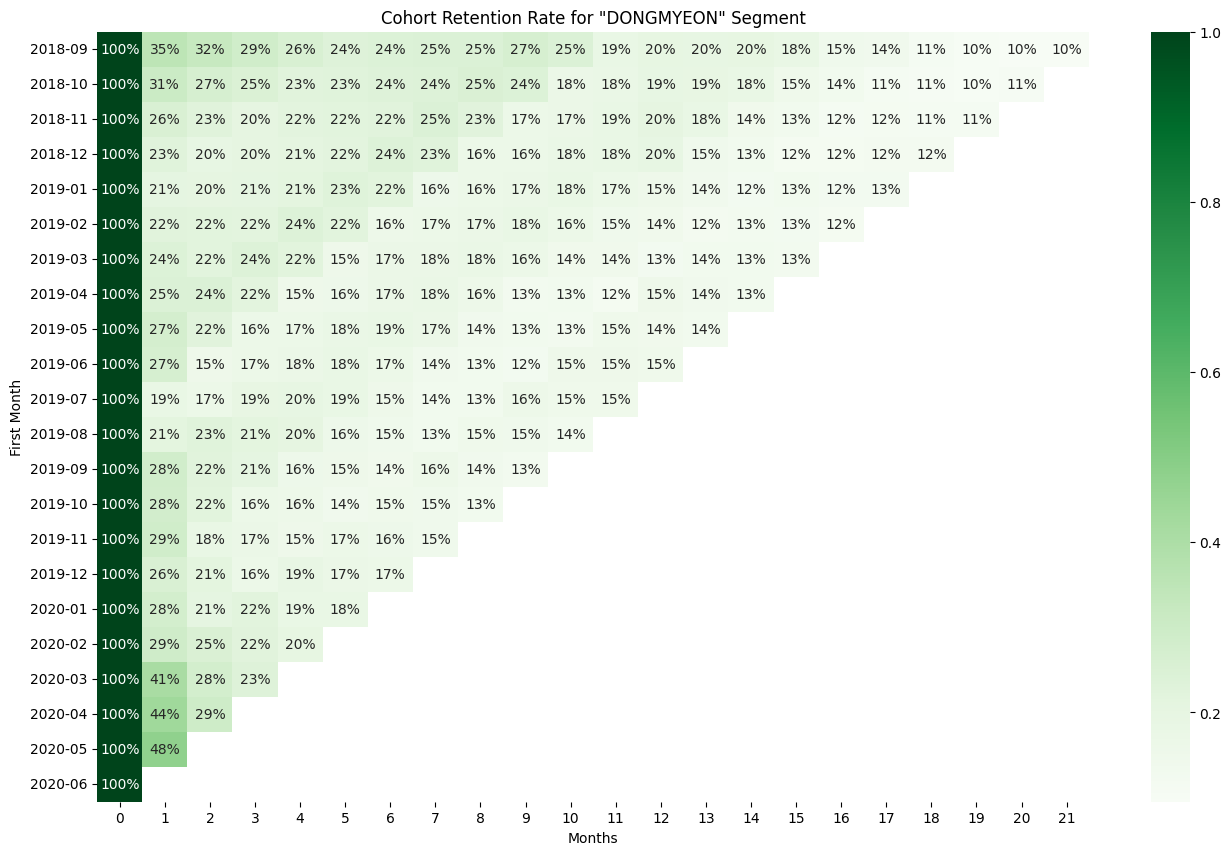

In [88]:
# '놓치면 안 될 고객' 세그먼트 필터링
segment = '동면 고객'
sg_group = test[test['segment'] == segment]

# 고객별로 최초 구매 날짜 컬럼 생성
sg_group['t_dat'] = pd.to_datetime(sg_group['t_dat'])
sg_group['first_date'] = sg_group.groupby('customer_id_le')['t_dat'].transform('min')

# df_cohort 변수에 반영
df_cohort = sg_group

# 월별 계산을 위해 dt.to_period('m')를 통해 년/월 형식으로 변경된 컬럼 추가
df_cohort['first_month'] = df_cohort['first_date'].dt.to_period('m')

# 고객별 월단위 cohort index 계산
df_cohort['months'] = (df_cohort['t_dat'].dt.to_period('m').dt.year - df_cohort['first_date'].dt.to_period('m').dt.year) * 12 + (df_cohort['t_dat'].dt.to_period('m').dt.month - df_cohort['first_date'].dt.to_period('m').dt.month)

# 최초 구매월 및 월단위 cohort index 계산
df_cohort2 = df_cohort.groupby(['first_month', 'months'])[['customer_id_le']].nunique().reset_index()

# 월별 비율 리텐션 계산을 위해, 분모에 들어갈 최초 구매월별 총 고객수 계산
df_cohort2['monthly_customers'] = df_cohort2.groupby('first_month')['customer_id_le'].transform('max')

# 비율 계산
df_cohort2['customer_ratio'] = df_cohort2['customer_id_le'] / df_cohort2['monthly_customers']

# 피벗 테이블 형태로 변형
cohort_pivot = df_cohort2.pivot_table(index='first_month', columns='months', values='customer_ratio')

# 시각화
plt.figure(figsize=(16, 10))
sns.heatmap(cohort_pivot, annot=True, fmt='.0%', cmap='Greens')
plt.title('Cohort Retention Rate for "DONGMYEON" Segment')
plt.xlabel('Months')
plt.ylabel('First Month')
plt.grid(False)
plt.show()








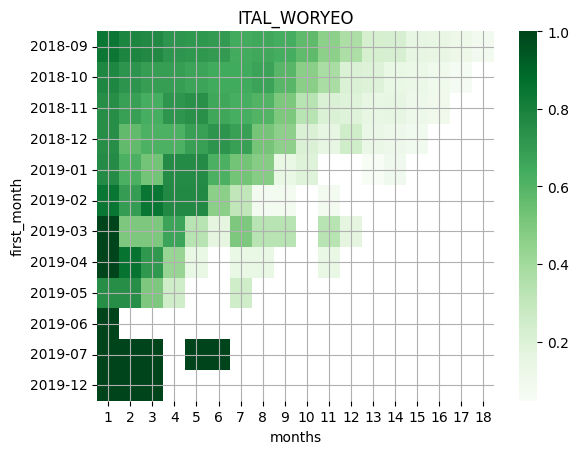

In [68]:
# 예시) 이탈 우려 고객 대상 리텐션
df_cohort2 = df_cohort[df_cohort['segment'].isin(['이탈 우려 고객'])].groupby(['first_month','months'])[['customer_id_le']].nunique().reset_index()
df_cohort2['monthly_customers'] = df_cohort2.groupby('first_month')['customer_id_le'].transform('max')
df_cohort2['customer_ratio'] = (df_cohort2['customer_id_le']/df_cohort2['monthly_customers'])
df_cohort2[df_cohort2['months']!=0].pivot_table(index='first_month', columns='months', values='customer_ratio').fillna('')
sns.heatmap(df_cohort2[df_cohort2['months']!=0].pivot_table(index='first_month', columns='months', values='customer_ratio'), cmap='Greens')
plt.title('ITAL_WORYEO')
plt.grid(None) # 격자 제거 (편집됨) 


In [69]:
print(df_cohort['segment'].unique())

['잠재 충성 고객' '놓치면 안 될 고객' '동면 고객' '이탈 고객' '이탈 우려 고객' '충성 고객' 'VIP 고객'
 '잠재 VIP 고객' '이탈 VIP 고객' '신규 고객']


In [77]:
# 예시) 이탈 우려 고객 대상 리텐션
df_cohort2 = df_cohort[df_cohort['segment'].isin(['신규 고객'])].groupby(['first_month','months'])[['customer_id_le']].nunique().reset_index()
df_cohort2['monthly_customers'] = df_cohort2.groupby('first_month')['customer_id_le'].transform('max')
df_cohort2['customer_ratio'] = (df_cohort2['customer_id_le']/df_cohort2['monthly_customers'])
df_cohort2[df_cohort2['months']!=0].pivot_table(index='first_month', columns='months', values='customer_ratio').fillna('')
sns.heatmap(df_cohort2[df_cohort2['months']!=0].pivot_table(index='first_month', columns='months', values='customer_ratio'), cmap='Greens')
plt.title('SINGYU')
plt.grid(None) # 격자 제거 (편집됨) 

ValueError: zero-size array to reduction operation fmin which has no identity

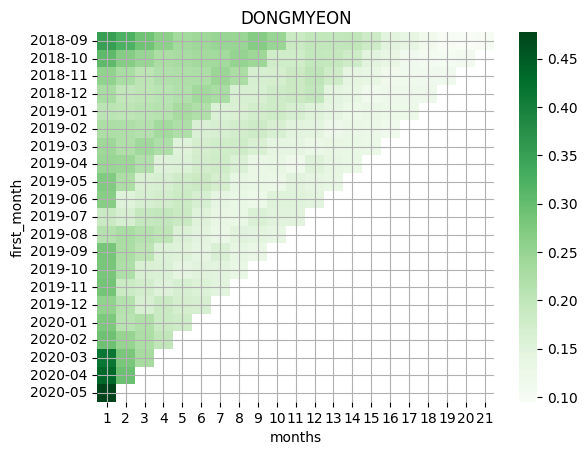

In [74]:
# 예시) 이탈 우려 고객 대상 리텐션
df_cohort2 = df_cohort[df_cohort['segment'].isin(['동면 고객'])].groupby(['first_month','months'])[['customer_id_le']].nunique().reset_index()
df_cohort2['monthly_customers'] = df_cohort2.groupby('first_month')['customer_id_le'].transform('max')
df_cohort2['customer_ratio'] = (df_cohort2['customer_id_le']/df_cohort2['monthly_customers'])
df_cohort2[df_cohort2['months']!=0].pivot_table(index='first_month', columns='months', values='customer_ratio').fillna('')
sns.heatmap(df_cohort2[df_cohort2['months']!=0].pivot_table(index='first_month', columns='months', values='customer_ratio'), cmap='Greens')
plt.title('DONGMYEON')
plt.grid(None) # 격자 제거 (편집됨) 

In [75]:
# 예시) 이탈 우려 고객 대상 리텐션
df_cohort2 = df_cohort[df_cohort['segment'].isin(['세일 러버'])].groupby(['first_month','months'])[['customer_id_le']].nunique().reset_index()
df_cohort2['monthly_customers'] = df_cohort2.groupby('first_month')['customer_id_le'].transform('max')
df_cohort2['customer_ratio'] = (df_cohort2['customer_id_le']/df_cohort2['monthly_customers'])
df_cohort2[df_cohort2['months']!=0].pivot_table(index='first_month', columns='months', values='customer_ratio').fillna('')
sns.heatmap(df_cohort2[df_cohort2['months']!=0].pivot_table(index='first_month', columns='months', values='customer_ratio'), cmap='Greens')
plt.title('SALELOVER')
plt.grid(None) # 격자 제거 (편집됨) 

ValueError: zero-size array to reduction operation fmin which has no identity